<a href="https://colab.research.google.com/github/ajaythakur3369/CipherByte-Technologies-Internship/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Spam Email Detection**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CipherByte Technologies**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CipherByte-Technologies-Internship)**

# **Problem Statement -**

We've all been recipients of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, often containing cryptic messages, scams, or, most dangerously, phishing content.

In this project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

**Dataset -** https://docs.google.com/spreadsheets/d/1_-QE2jc8QgH4XO-WYnQD49Kvg9HrZCInsi_tPVqBTjI/edit#gid=560893565

# **Let's Begin !**

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/CipherByte_Technologies/File_Name/Email_spam_dataset.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Explore data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
df.duplicated().sum()

409

In [ ]:
df.drop_duplicates()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [ ]:
df.columns = ['category', 'text']

In [ ]:
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df['category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int64

In [ ]:
df.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
x = df['category']
print(x)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int64


In [ ]:
y = df['text']
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


**Data visualization**

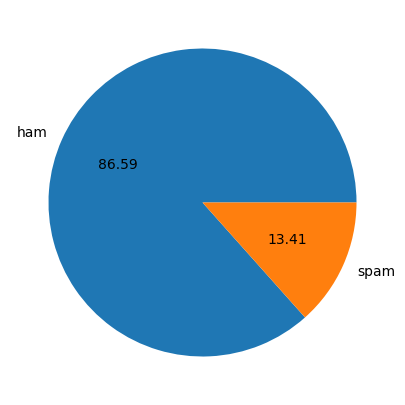

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.pie(df['category'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

<ipython-input-24-d448a5a81f3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'category', data = df, palette = 'RdBu', width = 0.2)


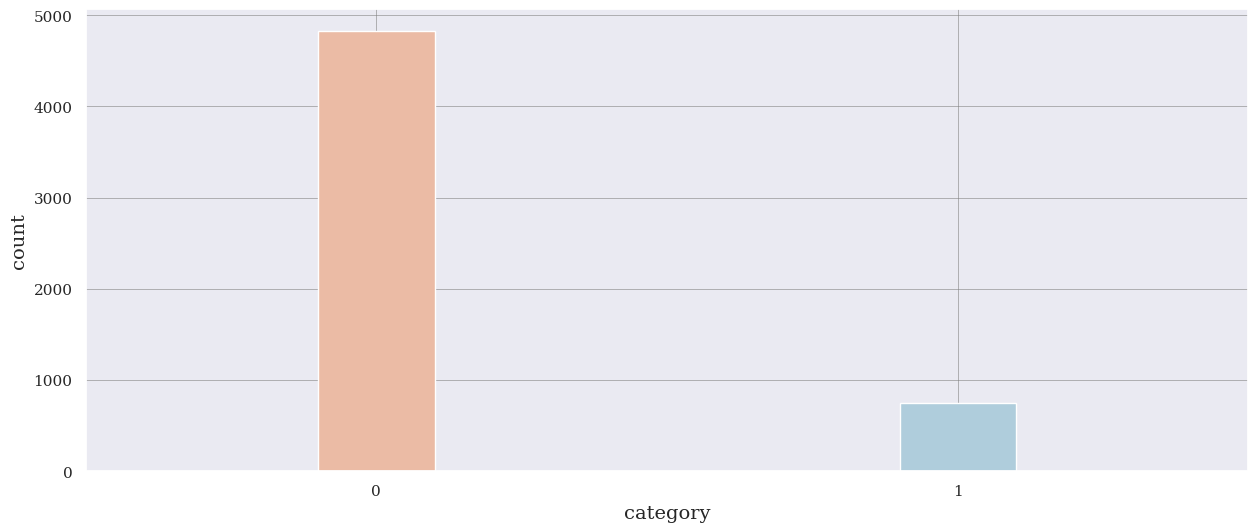

In [ ]:
sns.set(rc = {'figure.figsize':(15, 6)})
sns.countplot(x = 'category', data = df, palette = 'RdBu', width = 0.2)
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("category", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("count", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

**Splitting data**

In [ ]:
x = df['text']
y = df['category']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = .2)

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print(x.shape)

(5572,)


In [ ]:
print(x_train.shape)

(4457,)


In [ ]:
print(x_test.shape)

(1115,)


In [ ]:
x_train, x_test

(2322                              Should I be stalking u?
 4811       fyi I'm at usf now, swing by the room whenever
 951                              Shb b ok lor... Thanx...
 230     Get down in gandhipuram and walk to cross cut ...
 572                                Can you open the door?
                               ...                        
 3330            How much it will cost approx . Per month.
 70         Wah lucky man... Then can save money... Hee...
 132                             First answer my question.
 2014    Ambrith..madurai..met u in arun dha marrge..re...
 1931                  What pa tell me.. I went to bath:-)
 Name: text, Length: 4457, dtype: object,
 3409    Joy's father is John. Then John is the ____ of...
 2103    Its a site to simulate the test. It just gives...
 2665                       R u meeting da ge at nite tmr?
 3239    A cute thought for friendship: \Its not necess...
 1205    The whole car appreciated the last two! Dad an...
              

In [ ]:
y_train, y_test

(2322    0
 4811    0
 951     0
 230     0
 572     0
        ..
 3330    0
 70      0
 132     0
 2014    0
 1931    0
 Name: category, Length: 4457, dtype: int64,
 3409    0
 2103    0
 2665    0
 3239    0
 1205    0
        ..
 5020    0
 2141    0
 1265    0
 4094    0
 1839    0
 Name: category, Length: 1115, dtype: int64)

**Model Training**

In [ ]:
lo = LogisticRegression()
lo.fit(x_train_features, y_train)

LogisticRegression()

In [ ]:
prediction = lo.predict(x_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

0.96881310298407

In [ ]:
prediction = lo.predict(x_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9560538116591928

In [ ]:
demo_email = ['buy one get two movie tickets']

features = feature_extraction.transform(demo_email)

prediction = lo.predict(features)
print(prediction)

if (prediction[0] == 1):
    print("This is a ham email")
else:
    print("This is a spam email")

[0]
This is a spam email
